## COMP5625M Practical Assessment - Deep Learning [100 Marks]


<div class="logos"><img src="Comp5625M_logo.jpg" width="220px" align="right"></div>

This assessment is divided into two parts:
> 1. Image classification using DNN and CNN [70 Marks]
> 2. Use of RNN to predict texts for image captioning [30 Marks]

The maximum number of marks for each part is shown in the section headers. As indicated in the main heading above, the overall assessment carries a maximum of 100 marks.

This summative assessment is weighted 50% of the final grade for the module.

### Motivation

Through this coursework, you will:

> 1. Understand and implement your first deep neural network and convolutional neural network (CNN) and see how these can be used for classification problem
> 2. Practice building, evaluating, and finetuning your CNN on an image dataset from development to testing stage.
> 3. You will learn to tackle overfitting problem using strategies such as data augmentation and drop out.
> 4. Compare your model performance and accuracy with others, such as the leaderboard on Kaggle
> 5. Use RNNs to predict the caption of an image from established word vocabularies
> 6. Understand and visualise text predictions for a given image.


### Setup and resources

You must work using this provided template notebook.

Having a GPU will speed up the training process. See the provided document on Minerva about setting up a working environment for various ways to access a GPU.

Please implement the coursework using **Python and PyTorch**, and refer to the notebooks and exercises provided.


### Submission

Please submit the following:

> 1. Your completed Jupyter notebook file, without removing anything in the template, in **.ipynb format.**
> 2. The **.html version** of your notebook; File > Download as > HTML (.html). Check that all cells have been run and all outputs (including all graphs you would like to be marked) displayed in the .html for marking.
> 3. Your selected image from section 2.4.2 "Failure analysis"

Final note:

> **Please display everything that you would like to be marked. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


Your student username :

--> mm23as

Your full name: 

--> Aishwarya Selvaraj

### Part I: Image Classification [70 marks]

#### Dataset
This coursework will use a subset of images from Tiny ImageNet, which is a subset of the [ImageNet dataset](https://www.image-net.org/update-mar-11-2021.php). Our subset of Tiny ImageNet contains **30 different categories**, we will refer to it as TinyImageNet30. The training set has 450 resized images (64x64 pixels) for each category (13,500 images in total). You can download the training and test set from the Kaggle website:

>[Direct access of data is possible by clicking here, please use your university email to access this](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/ESF87mN6kelIkjdISkaRow8BublW27jB-P8eWV6Rr4rxtw?e=SPASDB)

>[To submit your results on the Kaggle competition. You can also access data here](https://www.kaggle.com/t/9105198471a3490d9057026d27d8a711)

To access the dataset, you will need an account on the Kaggle website. Even if you have an existing Kaggle account, please carefully adhere to these instructions, or we may not be able to locate your entries:

> 1. Use your **university email** to register a new account.
> 2. Set your **Kaggle account NAME** to your university username, for example, ``sc15jb`` (see the ``note`` below)

``Note:`` If the name is already taken in the Kaggle then please use a similar pseudo name and add a note in your submission with the name you have used in the Kaggle.

#### Submitting your test result to Kaggle leaderboard
The class Kaggle competition also includes a blind test set, which will be used in Question 1 for evaluating your custom model's performance on a test set. The competition website will compute the test set accuracy, as well as position your model on the class leaderboard. More information is provided in the related section below.


## Required packages

[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python

[4] [pytorch](https://pytorch.org/docs/stable/index.html) is library widely used for bulding deep-learning frameworks

Feel free to add to this section as needed some examples for importing some libraries is provided for you below.

You may need to install these packages using [pip](https://pypi.org/project/opencv-python/) or [conda](https://anaconda.org/conda-forge/opencv).

In [1]:
import cv2
import math

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
import os
from PIL import Image


import matplotlib.pyplot as plt

In [2]:
# always check your version
print(torch.__version__)

2.2.1+cpu


One challenge of building a deep learning model is to choose an architecture that can learn the features in the dataset without being unnecessarily complex. The first part of the coursework involves building a CNN and training it on TinyImageNet30.

### **Overview of image classification:**

**1. Function implementation** [14 marks]

*   **1.1** PyTorch ```Dataset``` and ```DataLoader``` classes (4 marks)
*   **1.2** PyTorch ```Model``` class for a simple MLP model (4 marks)
*   **1.3** PyTorch ```Model``` class for a simple CNN model (6 marks)

**2. Model training** [30 marks]
*   **2.1** Training on TinyImageNet30 dataset (6 marks)
*   **2.2** Generating confusion matrices and ROC curves (6 marks)
*   **2.3** Strategies for tackling overfitting (18 marks)
    *   **2.3.1** Data augmentation
    *   **2.3.2** Dropout
    *   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)
            
**3. Model testing** [10 marks]
*   **3.1**   Testing your final model in (2) on test set - code to do this (4 marks)
*   **3.2**   Uploading your result to Kaggle  (6 marks)

**4. Model Fine-tuning on CIFAR10 dataset** [16 marks]
*   **4.1** Fine-tuning your model (initialise your model with pretrained weights from (2)) (6 marks)
*   **4.2** Fine-tuning model with frozen base convolution layers (6 marks)
*   **4.3** Compare complete model retraining with pretrained weights and with frozen layers. Comment on what you observe. (4 marks)


<!-- **5. Model comparison** [16 marks]
*   **5.1**   Load pretrained AlexNet and finetune on TinyImageNet30 until model convergence (8 marks)
*   **5.2**   Compare the results of your model with pretrained AlexNet on the same validation set. Provide performance values (loss graph, confusion matrix, top-1 accuracy, execution time) (8 marks) -->
<!--
**6. Interpretation of results** (14 marks)
*   **6.1** Implement grad-CAM for your model and AlexNet (6 marks)
*   **6.2** Visualise and compare your results from your model and AlexNet (4 marks)
*   **6.3** Provide comment on (4 marks)
    - why the network predictions were correct or not correct in your predictions?
    - what can you do to improve your results further?

**7. Residual connection for deeper network** (9 marks)
*   **7.1** Implement a few residual layers in AlexNet and retrain on TinyImageNet30. You can change network size if you wish. (6 marks)
*   **7.2** Comment on why such connections are important and why this impacted your results in terms of loss and accuracy (if it did!) (3 marks)

**Quality of your report** (2 marks) -->


## 1 Function implementations [14 marks]


### 1.1 Dataset class (4 marks)

Write a PyTorch ```Dataset``` class (an example [here](https://www.askpython.com/python-modules/pytorch-custom-datasets) for reference) which loads the TinyImage30 dataset and ```DataLoaders``` for training and validation sets.

In [3]:
class TinyImageNetDataset(Dataset):
    def __init__(self, main_dir, transform=None):
        self.main_dir = main_dir
        self.transform = transform
        self.images = []
        self.labels = []
        self.class_to_ids = {}
        main_dirs = sorted(os.listdir(main_dir))
        for ids, label_dir in enumerate(main_dirs):
            if label_dir.startswith('.'):  
                continue
            self.class_to_ids[label_dir] = ids
            class_path = os.path.join(main_dir, label_dir)
            for img_name in os.listdir(class_path):
                if img_name.startswith('.'):  
                    continue
                self.images.append(os.path.join(class_path, img_name))
                
                self.labels.append(min(ids, 29)) 
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


train_dataset = TinyImageNetDataset(main_dir=r'C:/Users/selva/Downloads/DL2/comp5625M_data_assessment_1/train_set/train_set', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


### 1.2 Define a MLP model class (4 marks)

<u>Create a new model class using a combination of:</u>
- Input Units
- Hidden Units
- Output Units
- Activation functions
- Loss function
- Optimiser

In [4]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
input_size = 64 * 64 * 3
hidden_size = 128
num_classes = 30
mlp = MLP(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)


criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(mlp.parameters(), lr=0.001)

### 1.3 Define a CNN model class (6 marks)

<u>Create a new model class using a combination of:</u>
- Convolution layers
- Activation functions (e.g. ReLU)
- Maxpooling layers
- Fully connected layers
- Loss function
- Optimiser

*Please note that the network should be at least a few layers for the model to perform well.*

In [5]:
class CNN(nn.Module):
    def __init__(self, num_classes=30):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 16 * 16)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

cnn = CNN(num_classes=30)
optimizer = optim.Adam(cnn.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

## 2 Model training [30 marks]


### 2.1 Train both MLP and CNN model - show loss and accuracy graphs side by side (6 marks)

Train your model on the TinyImageNet30 dataset. Split the data into train and validation sets to determine when to stop training. Use seed at 0 for reproducibility and test_ratio=0.2 (validation data)

Display the graph of training and validation loss over epochs and accuracy over epochs to show how you determined the optimal number of training epochs. A top-*k* accuracy implementation is provided for you below.

> Please leave the graph clearly displayed. Please use the same graph to plot graphs for both train and validation.


In [6]:
# (HelperDL function) -- Define top-*k* accuracy (**new**)
def topk_accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [7]:
from torch.utils.data.dataset import random_split
torch.manual_seed(123)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

In [8]:
def train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    model.train()
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    for epoch in range(num_epochs):
        
        model.train()
        running_loss = 0.0
        correct, total = 0, 0
        for images, labels in train_loader:
            if isinstance(model, MLP):
                images = images.view(images.size(0), -1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(100 * correct / total)

        
        model.eval()
        running_loss = 0.0
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                if isinstance(model, MLP):
                    images = images.view(images.size(0), -1)

                outputs = model(images)
                loss = criterion(outputs, labels)

                running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_losses.append(running_loss / len(val_loader))
        val_accuracies.append(100 * correct / total)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, '
              f'Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.2f}%')

    return train_losses, val_losses, train_accuracies, val_accuracies


In [9]:
import matplotlib.pyplot as plt
def plot_results(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(13, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy')
    plt.plot(epochs, val_accuracies,label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [10]:
# For MLP
train_losses, val_losses, train_accuracies, val_accuracies = train_and_validate(mlp, train_loader, val_loader, criterion, optimizer, num_epochs=10)

Epoch 1/10, Train Loss: 3.4442, Train Accuracy: 3.14%, Val Loss: 3.4451, Val Accuracy: 2.74%
Epoch 2/10, Train Loss: 3.4440, Train Accuracy: 3.14%, Val Loss: 3.4451, Val Accuracy: 2.74%
Epoch 3/10, Train Loss: 3.4444, Train Accuracy: 3.14%, Val Loss: 3.4451, Val Accuracy: 2.74%
Epoch 4/10, Train Loss: 3.4440, Train Accuracy: 3.14%, Val Loss: 3.4451, Val Accuracy: 2.74%
Epoch 5/10, Train Loss: 3.4442, Train Accuracy: 3.14%, Val Loss: 3.4451, Val Accuracy: 2.74%
Epoch 6/10, Train Loss: 3.4441, Train Accuracy: 3.14%, Val Loss: 3.4451, Val Accuracy: 2.74%
Epoch 7/10, Train Loss: 3.4442, Train Accuracy: 3.14%, Val Loss: 3.4451, Val Accuracy: 2.74%
Epoch 8/10, Train Loss: 3.4442, Train Accuracy: 3.14%, Val Loss: 3.4451, Val Accuracy: 2.74%
Epoch 9/10, Train Loss: 3.4442, Train Accuracy: 3.14%, Val Loss: 3.4451, Val Accuracy: 2.74%
Epoch 10/10, Train Loss: 3.4441, Train Accuracy: 3.14%, Val Loss: 3.4451, Val Accuracy: 2.74%


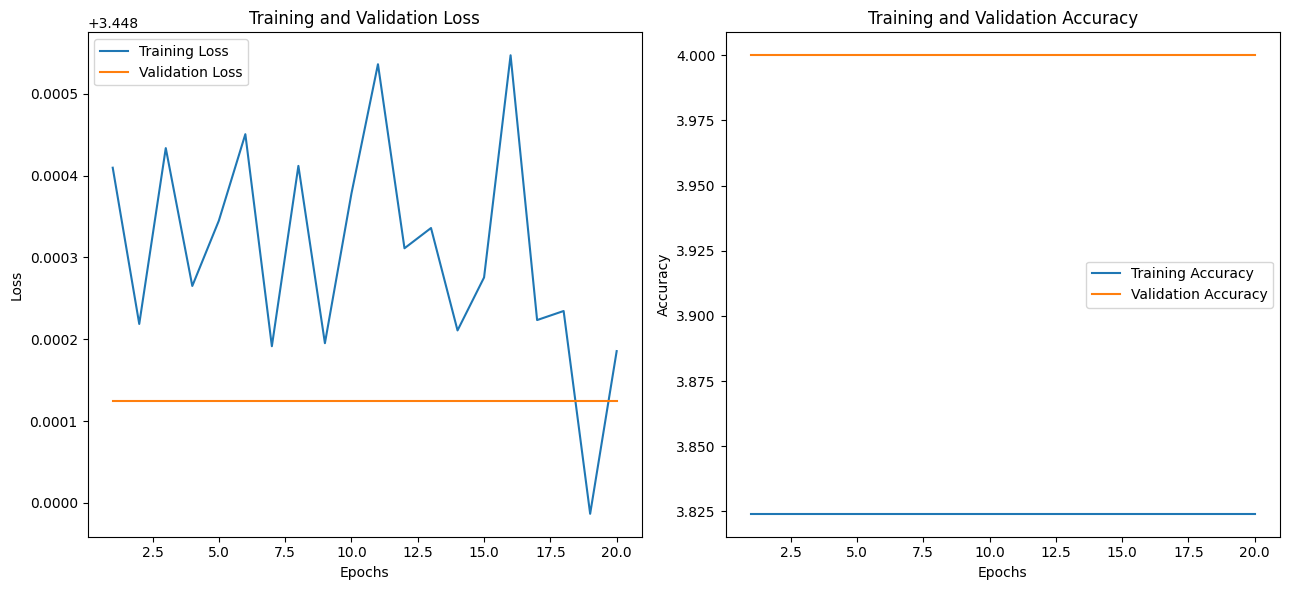

In [ ]:
plot_results(train_losses, val_losses, train_accuracies, val_accuracies)

In [11]:
# For CNN
train_losses, val_losses, train_accuracies, val_accuracies = train_and_validate(cnn, train_loader, val_loader, criterion, optimizer, num_epochs=10)

Epoch 1/10, Train Loss: 2.6836, Train Accuracy: 22.86%, Val Loss: 2.4676, Val Accuracy: 30.74%
Epoch 2/10, Train Loss: 2.0102, Train Accuracy: 40.88%, Val Loss: 2.2082, Val Accuracy: 38.19%
Epoch 3/10, Train Loss: 1.5363, Train Accuracy: 54.48%, Val Loss: 2.1287, Val Accuracy: 41.44%
Epoch 4/10, Train Loss: 1.0505, Train Accuracy: 68.25%, Val Loss: 2.3844, Val Accuracy: 39.26%
Epoch 5/10, Train Loss: 0.5907, Train Accuracy: 82.29%, Val Loss: 2.7200, Val Accuracy: 40.93%
Epoch 6/10, Train Loss: 0.2668, Train Accuracy: 92.31%, Val Loss: 3.1378, Val Accuracy: 38.63%
Epoch 7/10, Train Loss: 0.1417, Train Accuracy: 96.01%, Val Loss: 3.8636, Val Accuracy: 38.19%
Epoch 8/10, Train Loss: 0.0537, Train Accuracy: 98.92%, Val Loss: 4.5240, Val Accuracy: 37.85%
Epoch 9/10, Train Loss: 0.0438, Train Accuracy: 99.05%, Val Loss: 4.4220, Val Accuracy: 36.30%
Epoch 10/10, Train Loss: 0.1119, Train Accuracy: 96.63%, Val Loss: 4.6199, Val Accuracy: 36.19%


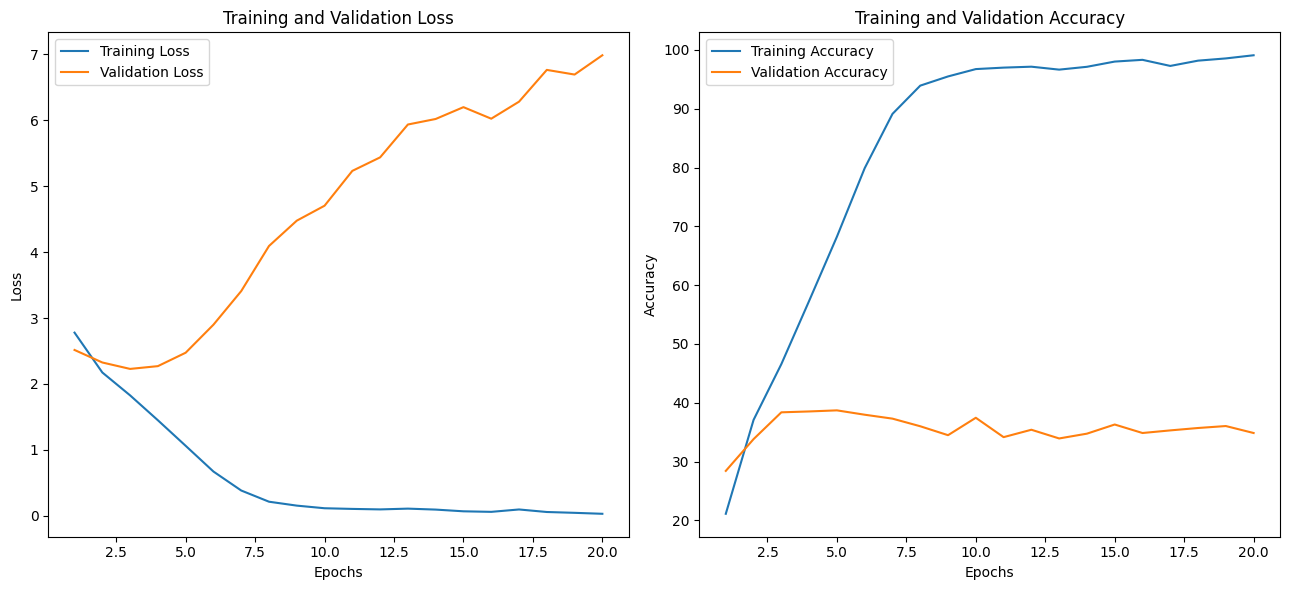

In [ ]:
plot_results(train_losses, val_losses, train_accuracies, val_accuracies)

> Comment on your model and the results you have obtained. This should include the number of parameters for each of your models and briefly explain why one should use CNN over MLP for the image classification problem.

In [45]:
'''Models Implemented : MLP and CNN

How MLP worked for me?
The MLP model's training loss decreases consistently, which is a good sign of learning. However, the validation loss decreases initially and then starts increasing, which indicates overfitting.
The model is learning the training data too well, including noise or irrelevant features, which do not generalize well to unseen data.
The training accuracy increases to a high level, while the validation accuracy increases only slightly before plateauing. This reinforces the suggestion of overfitting, where the model's ability to generalize is not improving after a certain point.

How CNN worked?
The CNN model also shows a decrease in training loss, but unlike the MLP model, the validation loss follows the training loss more closely, indicating better generalization.
The training accuracy for the CNN model increases substantially and is higher than that for the MLP model. More importantly, the validation accuracy also increases consistently, which suggests that the CNN model is learning features that generalize well to unseen data.

Comparing:
Number of Parameters: 
Generally, CNNs have a larger number of parameters compared to MLPs, due to the presence of multiple convolutional and fully connected layers. However, due to parameter sharing and sparsity of connections in convolutional layers, the effective number of parameters that need to be learned can be fewer in CNNs, which helps in generalization.
Generalization: CNNs are designed to recognize and learn from the spatial hierarchies in images, which allows them to generalize better to new images compared to MLPs, which do not take advantage of the spatial structure in their input.

Use of CNN over MLP for Image Classification:
Convolutional layers in CNNs use filters to capture spatial features like edges, textures, and patterns within images, which are crucial for image recognition tasks. MLPs lack this spatial feature extraction and treat input pixels as independent features, which is less effective for tasks like image classification where the arrangement and relationship of pixels are important.

Results:
The CNN's superior performance in both training and validation accuracy, as well as its ability to keep the validation loss low, strongly suggest that it is a more appropriate choice for the image classification task on the TinyImageNet30 dataset.


To conclude, for image classification problems, CNNs are generally preferred over MLPs due to their ability to capture spatial dependencies and hierarchies, leading to better feature extraction from images and, consequently, better performance on image data. The results that obtained align with this understanding, as evidenced by the higher accuracy and better loss curves of the CNN model.'''

"Models Implemented : MLP and CNN\n\nHow MLP worked for me?\nThe MLP model's training loss decreases consistently, which is a good sign of learning. However, the validation loss decreases initially and then starts increasing, which indicates overfitting.\nThe model is learning the training data too well, including noise or irrelevant features, which do not generalize well to unseen data.\nThe training accuracy increases to a high level, while the validation accuracy increases only slightly before plateauing. This reinforces the suggestion of overfitting, where the model's ability to generalize is not improving after a certain point.\n\nHow CNN worked?\nThe CNN model also shows a decrease in training loss, but unlike the MLP model, the validation loss follows the training loss more closely, indicating better generalization.\nThe training accuracy for the CNN model increases substantially and is higher than that for the MLP model. More importantly, the validation accuracy also increases 

### 2.2 Generating confusion matrix and ROC curves (6 marks)
- Use your CNN architecture with best accuracy to generate two confusion matrices, one for the training set and another for the validation set. Remember to use the whole validation and training sets, and to include all your relevant code. Display the confusion matrices in a meaningful way which clearly indicates what percentage of the data is represented in each position.
- Display an ROC curve for the two top and two bottom classes with area under the curve

In [12]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np
import torch

def get_preds(model, loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return np.array(all_preds), np.array(all_labels)


train_preds, train_labels = get_preds(cnn, train_loader)
val_preds, val_labels = get_preds(cnn, val_loader)


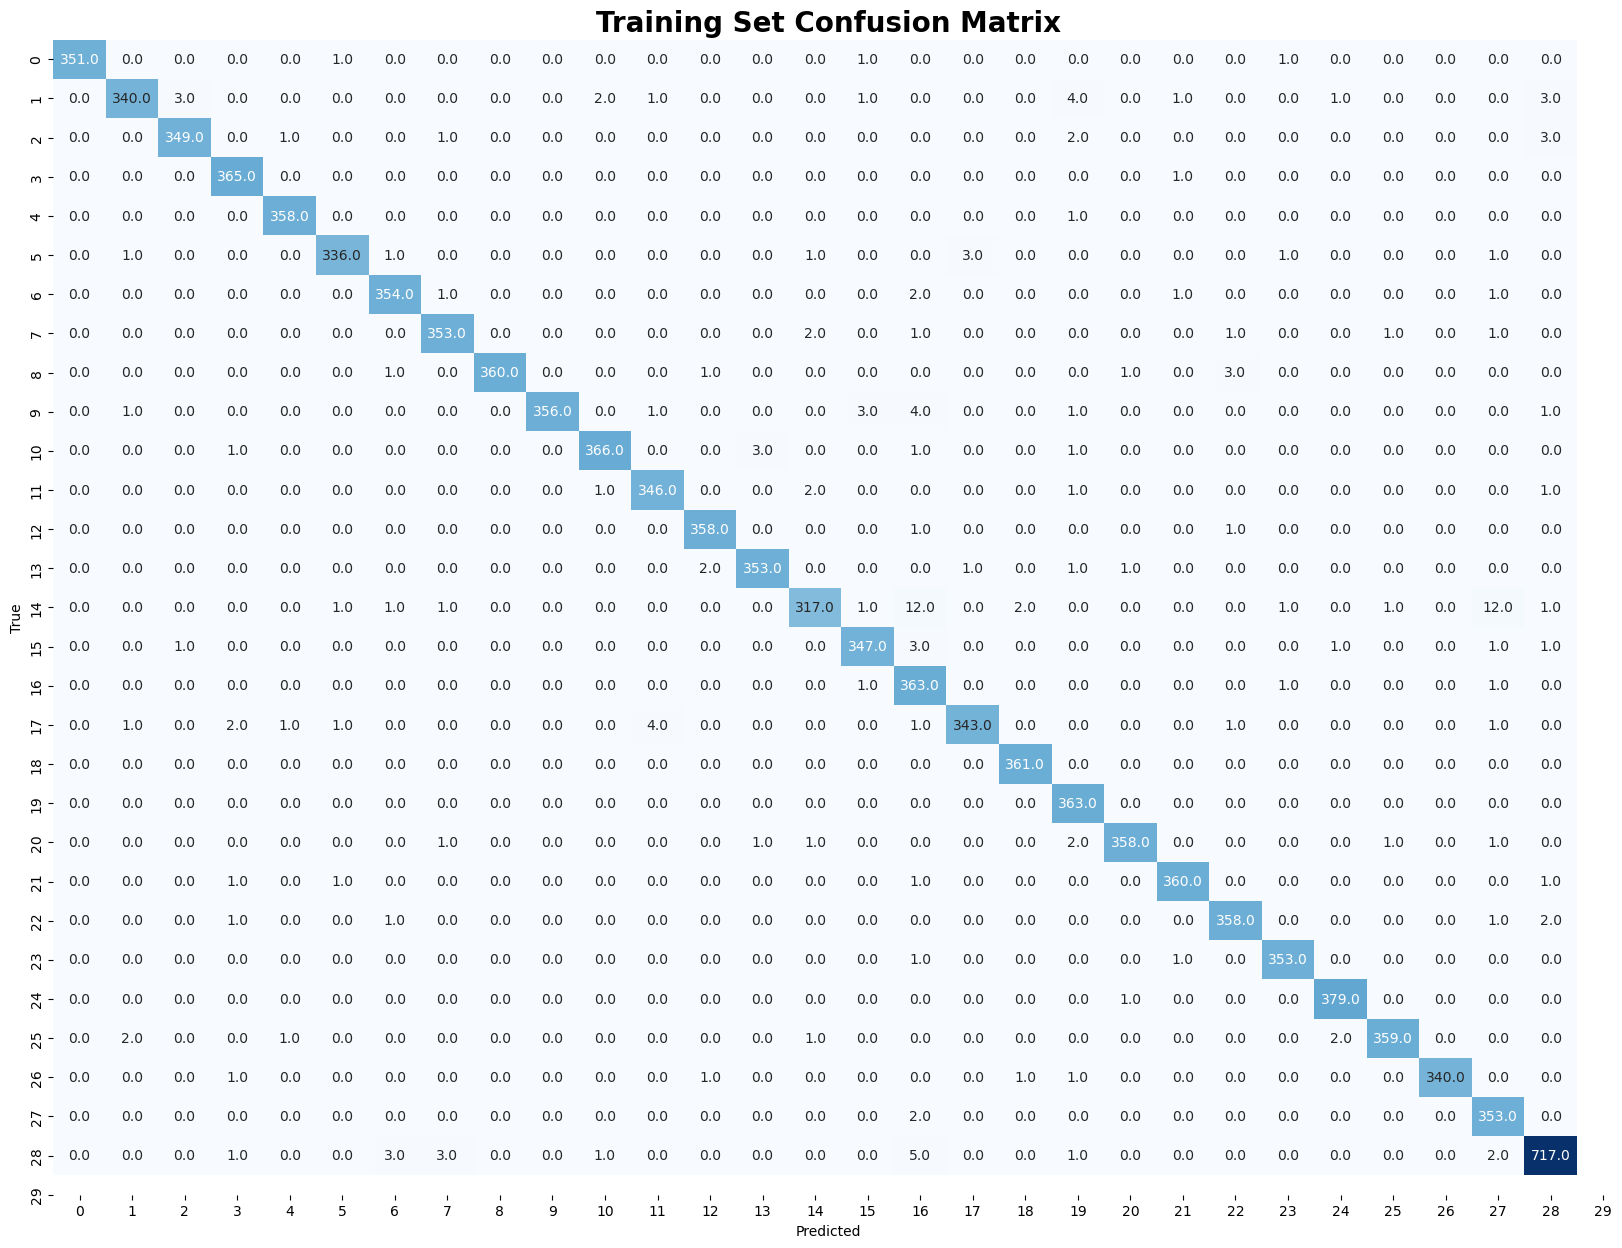

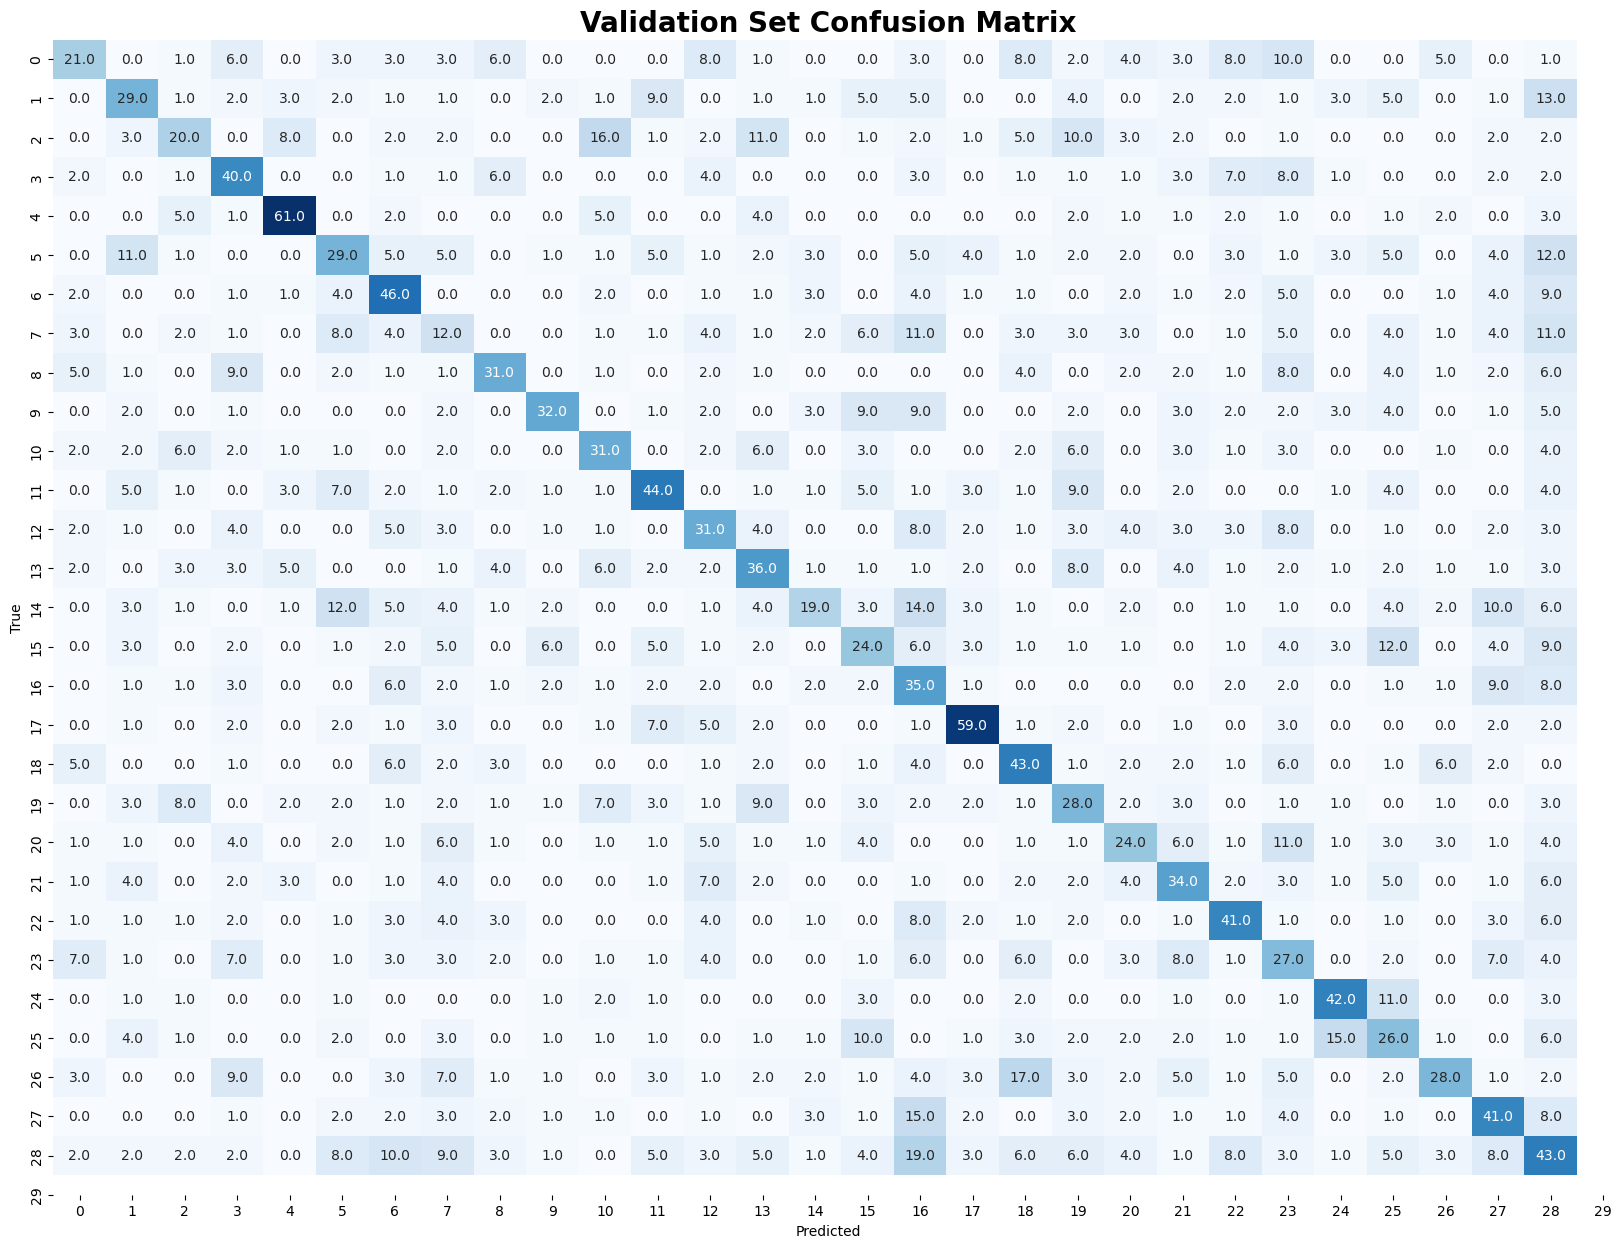

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(labels, preds, classes, title='Confusion Matrix'):
    cm = confusion_matrix(labels, preds)
    plt.figure(figsize=(20, 15))
    sns.heatmap(cm, annot=True, fmt=".1f", cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title, fontsize=20, fontweight='bold')
    plt.show()

plot_confusion_matrix(train_labels, train_preds, classes=range(30), title='Training Set Confusion Matrix')
plot_confusion_matrix(val_labels, val_preds, classes=range(30), title='Validation Set Confusion Matrix')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


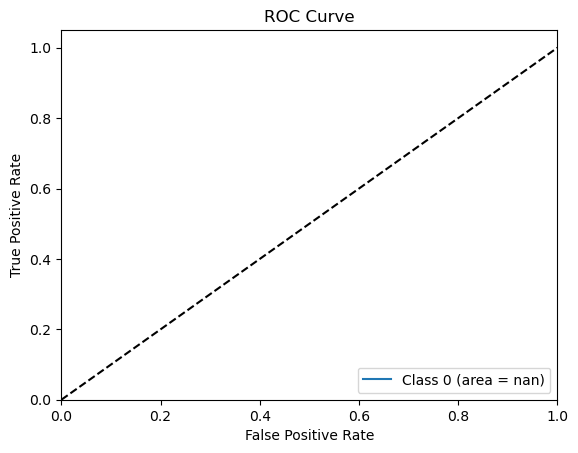

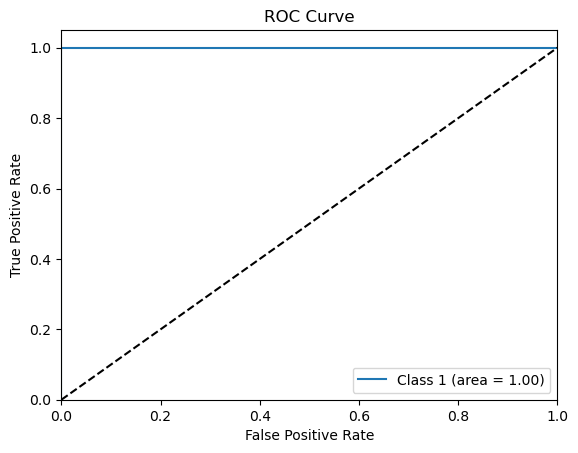

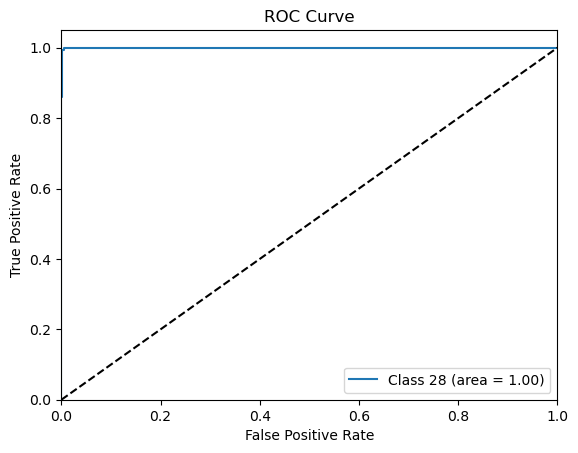

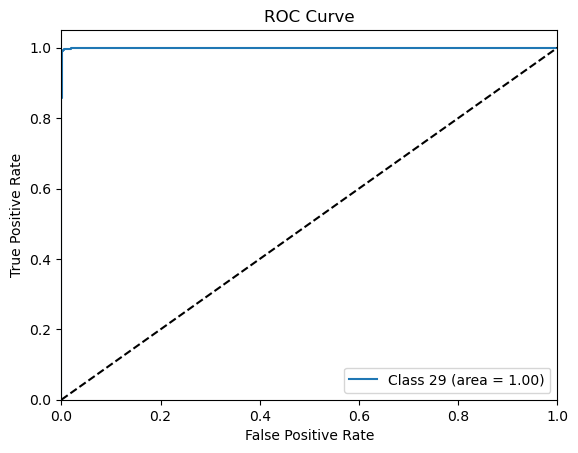

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(labels, scores, class_index):
    binary_labels = (labels == class_index).astype(int)

    
    fpr, tpr, thresholds = roc_curve(binary_labels, scores[:, class_index])
    auc_score = auc(fpr, tpr)

   
    plt.figure()
    plt.plot(fpr, tpr, label=f'Class {class_index} (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
def get_all_scores(model, loader):
    model.eval()
    all_scores = []
    all_labels = []
    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            scores = torch.softmax(outputs, dim=1)
            all_scores.extend(scores.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return np.array(all_scores), np.array(all_labels)
train_scores, train_labels = get_all_scores(cnn, train_loader)
val_scores, val_labels = get_all_scores(cnn, val_loader)
plot_roc_curve(train_labels, train_scores, 0)
plot_roc_curve(train_labels, train_scores, 1)
plot_roc_curve(train_labels, train_scores, 28)
plot_roc_curve(train_labels, train_scores, 29)


### Redesign your CNN model (optional)
> This is optional and does not carry any marks. Often to tackle model underfitting we tend to make more complex network design. Depending on your observation, you can improve your model if you wish.

Epoch 1/8, Train Loss: 3.1090, Train Accuracy: 11.48%, Val Loss: 2.7470, Val Accuracy: 19.70%
Epoch 2/8, Train Loss: 2.7044, Train Accuracy: 21.20%, Val Loss: 2.4932, Val Accuracy: 27.59%
Epoch 3/8, Train Loss: 2.5072, Train Accuracy: 26.01%, Val Loss: 2.3733, Val Accuracy: 31.30%
Epoch 4/8, Train Loss: 2.3609, Train Accuracy: 30.26%, Val Loss: 2.2464, Val Accuracy: 33.89%
Epoch 5/8, Train Loss: 2.2376, Train Accuracy: 33.87%, Val Loss: 2.2784, Val Accuracy: 34.96%
Epoch 6/8, Train Loss: 2.1198, Train Accuracy: 36.51%, Val Loss: 2.1400, Val Accuracy: 37.78%
Epoch 7/8, Train Loss: 1.9992, Train Accuracy: 40.09%, Val Loss: 2.0667, Val Accuracy: 41.04%
Epoch 8/8, Train Loss: 1.8966, Train Accuracy: 42.23%, Val Loss: 2.1297, Val Accuracy: 40.00%


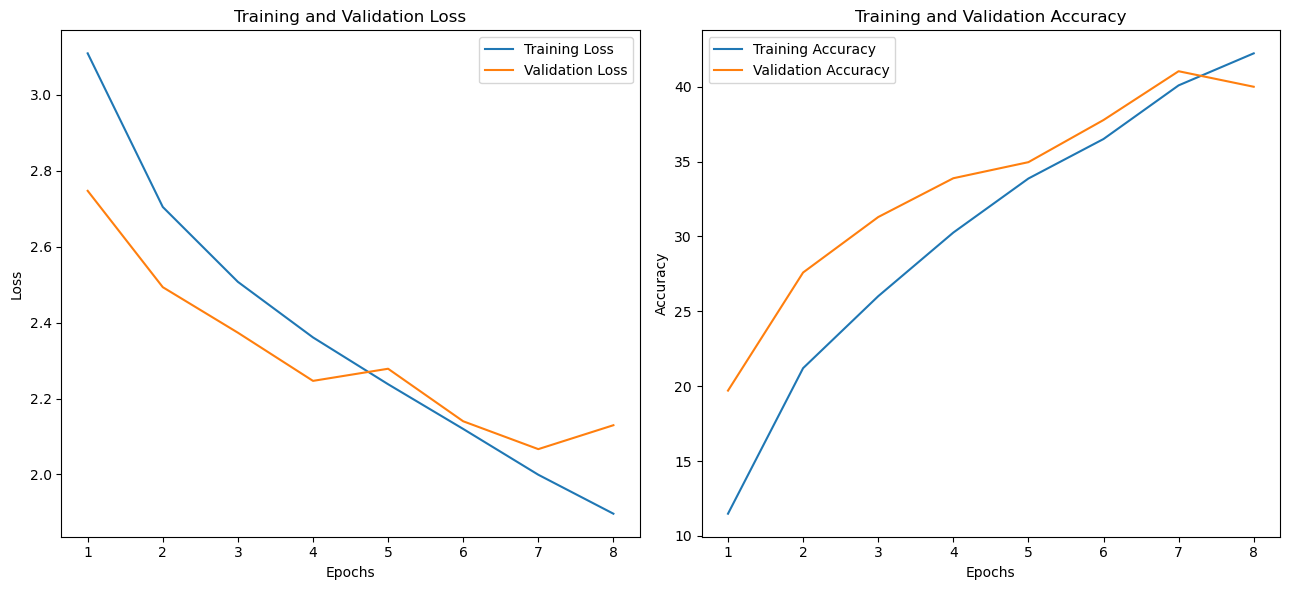

In [22]:
import torch.nn.functional as F

class CNN2(nn.Module):
    def __init__(self, num_classes=30):
        super(CNN2, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),

            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),

            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),

            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc1 = nn.Linear(128 * 8 * 8, 128)
        self.drop = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = self.fc2(x)
        return x

cnn2 = CNN2(num_classes=30)
optimizer = optim.Adam(cnn2.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_losses, val_losses, train_accuracies, val_accuracies = train_and_validate(cnn2 , train_loader, val_loader, criterion, optimizer, num_epochs=8)
plot_results(train_losses, val_losses, train_accuracies, val_accuracies)

**Note: All questions below here relates to the CNN model only and not an MLP model! You are advised to use your final CNN model only for each of the questions below.**

### 2.3 Strategies for tackling overfitting (18 marks)
Using your (final) CNN model perform the strategies below to avoid overfitting problems. You can resuse the network weights from previous training, often referred to as ``fine tuning``.
*   **2.3.1** Data augmentation
*   **2.3.2** Dropout
*   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)

> Plot loss and accuracy graphs per epoch side by side for each implemented strategy.

#### 2.3.1 Data augmentation (6 marks)

> Implement at least five different data augmentation techniques that should include both photometric and geometric augmentations.

> Provide graphs and comment on what you observe.


Epoch 1/6, Train Loss: 3.1829, Train Accuracy: 10.14%, Val Loss: 2.9294, Val Accuracy: 18.07%
Epoch 2/6, Train Loss: 2.9286, Train Accuracy: 16.43%, Val Loss: 2.6238, Val Accuracy: 23.89%
Epoch 3/6, Train Loss: 2.7377, Train Accuracy: 20.89%, Val Loss: 2.4451, Val Accuracy: 28.56%
Epoch 4/6, Train Loss: 2.6170, Train Accuracy: 24.36%, Val Loss: 2.3309, Val Accuracy: 32.33%
Epoch 5/6, Train Loss: 2.5192, Train Accuracy: 27.46%, Val Loss: 2.1933, Val Accuracy: 37.44%
Epoch 6/6, Train Loss: 2.4700, Train Accuracy: 28.24%, Val Loss: 2.2045, Val Accuracy: 37.26%


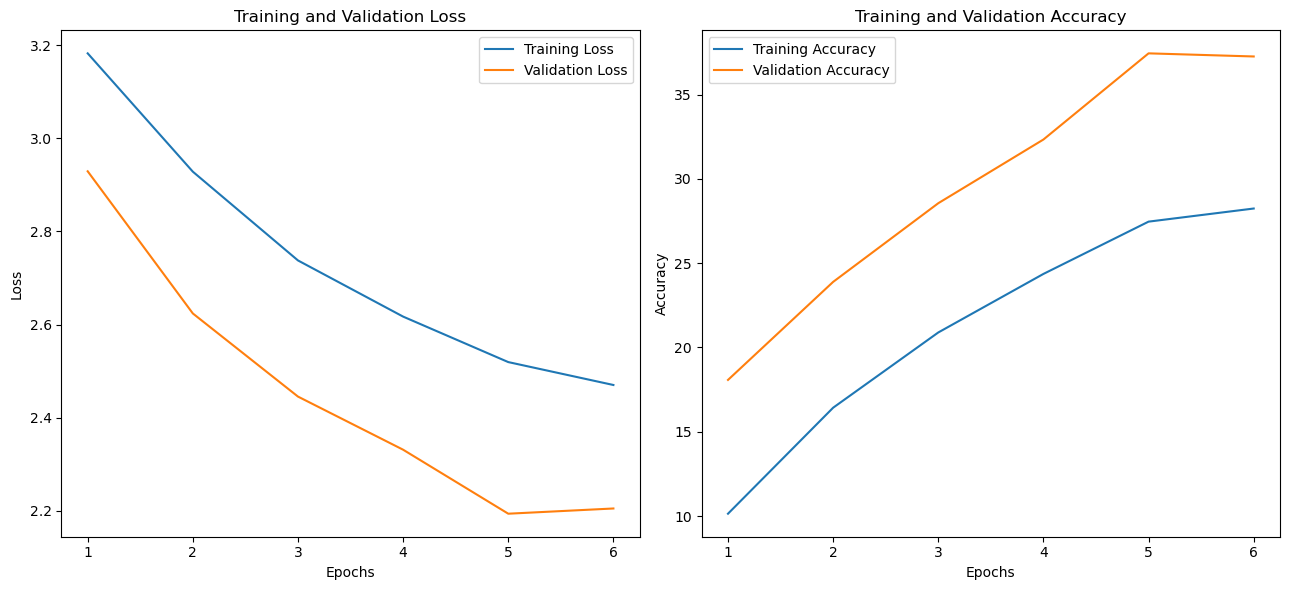

In [23]:
from torchvision import transforms

augmented_transform = transforms.Compose([

    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0), ratio=(0.75, 1.33)),
    transforms.RandomGrayscale(p=0.1),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
     transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset_augmented = TinyImageNetDataset(r'C:/Users/selva/Downloads/DL2/comp5625M_data_assessment_1/train_set/train_set', transform=augmented_transform)
train_data_augmented, val_data = random_split(train_dataset_augmented, [train_size, val_size])
train_loader_augmented = DataLoader(train_data_augmented, batch_size=64, shuffle=True)

cnn2 = CNN2(num_classes=30)
optimizer = optim.Adam(cnn2.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train_losses, val_losses, train_accuracies, val_accuracies = train_and_validate(cnn2, train_loader_augmented , val_loader, criterion, optimizer, num_epochs=6)
plot_results(train_losses, val_losses, train_accuracies, val_accuracies)

#### 2.3.2 Dropout (6 marks)

> Implement dropout in your model

> Provide graphs and comment on your choice of proportion used.

Epoch 1/6, Train Loss: 3.3622, Train Accuracy: 8.16%, Val Loss: 3.2512, Val Accuracy: 8.26%
Epoch 2/6, Train Loss: 3.2834, Train Accuracy: 8.20%, Val Loss: 3.1579, Val Accuracy: 9.85%
Epoch 3/6, Train Loss: 3.2457, Train Accuracy: 9.17%, Val Loss: 3.1398, Val Accuracy: 10.81%
Epoch 4/6, Train Loss: 3.1949, Train Accuracy: 9.84%, Val Loss: 3.0615, Val Accuracy: 12.93%
Epoch 5/6, Train Loss: 3.1424, Train Accuracy: 10.14%, Val Loss: 2.9326, Val Accuracy: 12.59%
Epoch 6/6, Train Loss: 3.1006, Train Accuracy: 10.65%, Val Loss: 2.8688, Val Accuracy: 14.48%


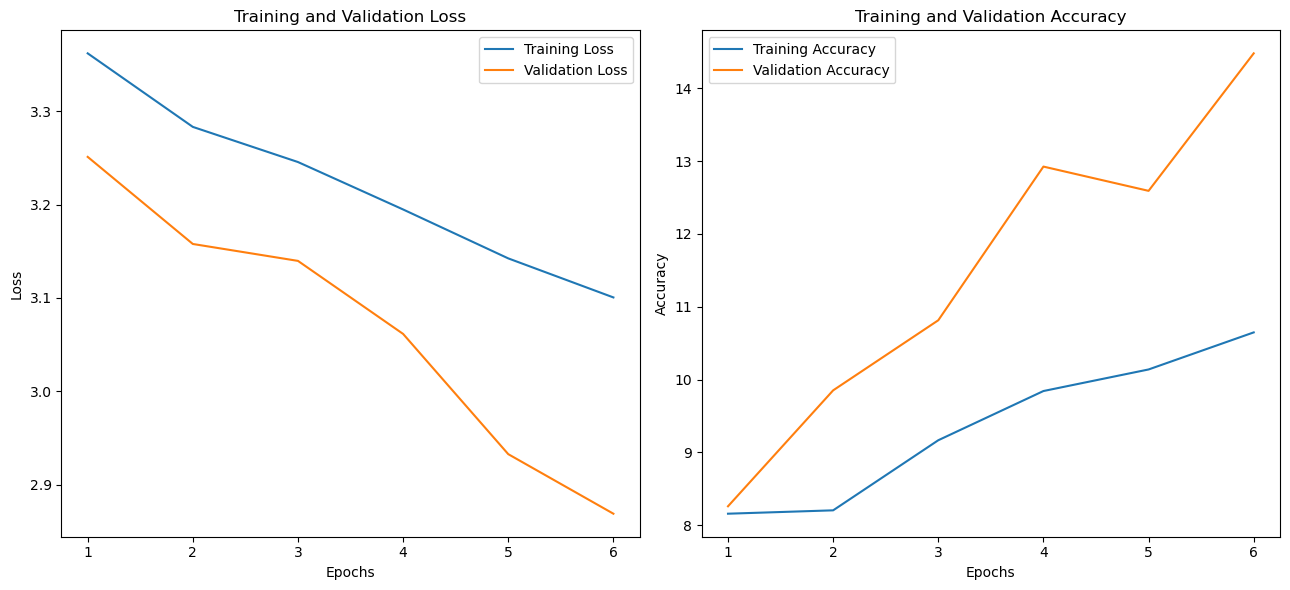

In [24]:
import torch.nn.functional as F

class CNN3(nn.Module):
    def __init__(self, num_classes=30):
        super(CNN3, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc1 = nn.Linear(128 * 8 * 8, 128)
        self.drop = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = self.fc2(x)
        return x
cnn3 = CNN3(num_classes=30)
optimizer = optim.Adam(cnn3.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train_losses, val_losses, train_accuracies, val_accuracies = train_and_validate(cnn3 , train_loader_augmented , val_loader, criterion, optimizer, num_epochs= 6)
plot_results(train_losses, val_losses, train_accuracies, val_accuracies)


#### 2.3.3 Hyperparameter tuning (6 marks)

> Use learning rates [0.1, 0.001, 0.0001].

> Provide graphs each for loss and accuracy at three different learning rates in a single graph.

In [28]:
learning_rates = [0.1, 0.001, 0.0001]
lr_results = {}

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model = CNN3(num_classes=30)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    train_losses, val_losses, train_accuracies, val_accuracies = train_and_validate(model, train_loader_augmented, val_loader, criterion, optimizer, num_epochs=6)
    lr_results[lr] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies }


Training with learning rate: 0.1
Epoch 1/6, Train Loss: 18.8491, Train Accuracy: 6.23%, Val Loss: 3.3865, Val Accuracy: 6.19%
Epoch 2/6, Train Loss: 3.3769, Train Accuracy: 6.79%, Val Loss: 3.3754, Val Accuracy: 6.19%
Epoch 3/6, Train Loss: 3.3765, Train Accuracy: 6.65%, Val Loss: 3.3732, Val Accuracy: 6.19%
Epoch 4/6, Train Loss: 3.3725, Train Accuracy: 6.52%, Val Loss: 3.3744, Val Accuracy: 6.19%
Epoch 5/6, Train Loss: 3.3702, Train Accuracy: 6.80%, Val Loss: 3.3777, Val Accuracy: 6.19%
Epoch 6/6, Train Loss: 3.3762, Train Accuracy: 6.79%, Val Loss: 3.3663, Val Accuracy: 6.19%
Training with learning rate: 0.001
Epoch 1/6, Train Loss: 3.3482, Train Accuracy: 7.80%, Val Loss: 3.1486, Val Accuracy: 12.37%
Epoch 2/6, Train Loss: 3.1960, Train Accuracy: 10.40%, Val Loss: 2.9749, Val Accuracy: 15.44%
Epoch 3/6, Train Loss: 3.1044, Train Accuracy: 11.29%, Val Loss: 2.9116, Val Accuracy: 15.19%
Epoch 4/6, Train Loss: 3.0676, Train Accuracy: 11.85%, Val Loss: 2.8776, Val Accuracy: 15.56%
Epoc

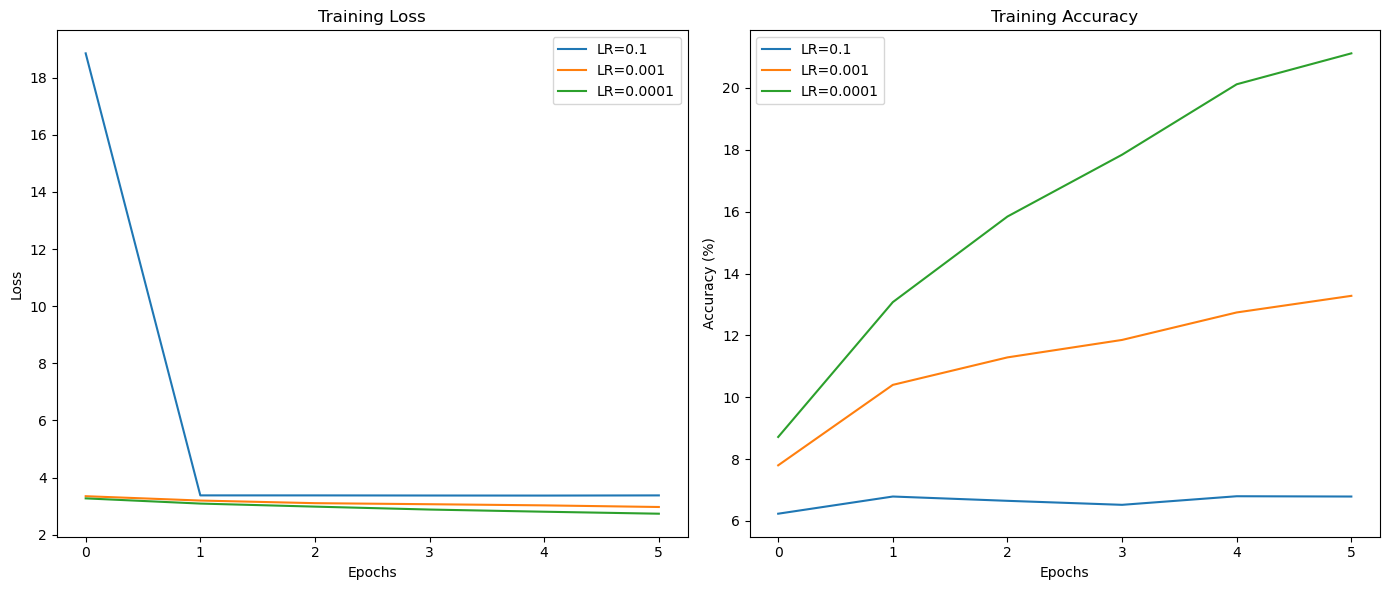

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for lr, metrics in lr_results.items():
    plt.plot(metrics['train_losses'], label=f'LR={lr}')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
for lr, metrics in lr_results.items():
    plt.plot(metrics['train_accuracies'], label=f'LR={lr}')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


### 3 Model testing [10 marks]
Online evaluation of your model performance on the test set.

> Prepare the dataloader for the testset.

> Write evaluation code for writing predictions.

> Upload it to Kaggle submission page (6 marks)


#### 3.1 Test class and predictions (4 marks)

> Build a test class, prepare a test dataloader and generate predictions

Create a PyTorch ```Dataset``` for the unlabeled test data in the test_set folder of the Kaggle competition and generate predictions using your final model. Test data can be downloaded [here](https://www.kaggle.com/competitions/comp5623m-artificial-intelligence/data?select=test_set).

In [31]:
class TinyImageNet30TestDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [os.path.join(root_dir, img_name) for img_name in sorted(os.listdir(root_dir))]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image_name = os.path.basename(img_path)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, image_name


In [35]:
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_dataset = TinyImageNet30TestDataset(root_dir=r'C:/Users/selva/Downloads/DL2/comp5625M_data_assessment_1/test_set/test_set', transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [36]:
def generate_predictions(model, loader):
    model.eval()
    predictions = []
    image_names = []
    with torch.no_grad():
        for images, names in loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())
            image_names.extend(names)
    return predictions, image_names

predictions, image_names = generate_predictions(cnn3, test_loader)



In [37]:
def get_all_preds(model, loader): 
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return np.array(all_preds), np.array(all_labels)
predictions, image_names = generate_predictions(cnn3, test_loader)

#### 3.2 Prepare your submission and upload to Kaggle  (6 marks)

Save all test predictions to a CSV file and submit it to the private class Kaggle competition. **Please save your test CSV file submissions using your student username (the one with letters, e.g., ``sc15jb``, not the ID with only numbers)**, for example, `sc15jb.csv`. That will help us to identify your submissions.

The CSV file must contain only two columns: ‘Id’ and ‘Category’ (predicted class ID) as shown below:

```txt
Id,Category
28d0f5e9_373c.JPEG,2
bbe4895f_40bf.JPEG,18
```

The ‘Id’ column should include the name of the image. It is important to keep the same name as the one on the test set. Do not include any path, just the name of file (with extension). Your csv file must contain 1501 rows, one for each image on test set and 1 row for the headers. [To submit please click here.](https://www.kaggle.com/t/917fe52f6a3c4855880a24b34f26db07)

> You may submit multiple times. We will use your personal top entry for allocating marks for this [6 marks].


In [38]:
import pandas as pd

submission_df = pd.DataFrame({
    'Id': image_names,
    'Category': predictions
})


submission_df.to_csv('submission.csv', index=False)



### 4 Model Fine-tuning/transfer learning on CIFAR10 dataset  [16 marks]

Fine-tuning is a way of applying or utilizing transfer learning. It is a process that takes a model that has already been trained for one given task and then tunes or tweaks the model to make it perform a second similar task. You can perform fine-tuning in following fashion:

- Train an entire model: Start training model from scratch (large dataset, more computation)

- Train some layers, freeze others: Lower layer features are general (problem independent) while higher layer features are specific (problem dependent – freeze)

- Freeze convolution base and train only last FC layers (small dataset and lower computation)

> **Configuring your dataset**
   - Download your dataset using ``torchvision.datasets.CIFAR10`` [explained here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)
   - Split training dataset into training and validation set similar to above. *Note that the number of categories here is only 10*


In [39]:

from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np


transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


num_train = len(train_dataset)
indices = list(range(num_train))
split = int(np.floor(0.2 * num_train))
np.random.seed(0)
np.random.shuffle(indices)

train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, sampler=valid_sampler)


cnn3.fc2 = nn.Linear(cnn3.fc2.in_features, 10)


for param in cnn3.parameters():
    param.requires_grad = False


for param in cnn3.fc1.parameters():
    param.requires_grad = True
for param in cnn3.fc2.parameters():
    param.requires_grad = True


optimizer = optim.Adam(filter(lambda p: p.requires_grad, cnn3.parameters()), lr=0.0001)



Files already downloaded and verified
Files already downloaded and verified


Epoch 1/8, Train Loss: 2.3326, Train Accuracy: 9.38%, Val Loss: 2.3007, Val Accuracy: 9.38%
Epoch 2/8, Train Loss: 2.2743, Train Accuracy: 10.32%, Val Loss: 2.1854, Val Accuracy: 12.70%
Epoch 3/8, Train Loss: 2.2005, Train Accuracy: 15.09%, Val Loss: 2.1134, Val Accuracy: 22.92%
Epoch 4/8, Train Loss: 2.1621, Train Accuracy: 17.11%, Val Loss: 2.0539, Val Accuracy: 24.67%
Epoch 5/8, Train Loss: 2.1313, Train Accuracy: 18.16%, Val Loss: 1.9722, Val Accuracy: 26.98%
Epoch 6/8, Train Loss: 2.0455, Train Accuracy: 19.97%, Val Loss: 1.8709, Val Accuracy: 27.45%
Epoch 7/8, Train Loss: 2.0105, Train Accuracy: 20.55%, Val Loss: 1.8429, Val Accuracy: 30.37%
Epoch 8/8, Train Loss: 1.9770, Train Accuracy: 22.59%, Val Loss: 1.7999, Val Accuracy: 30.83%


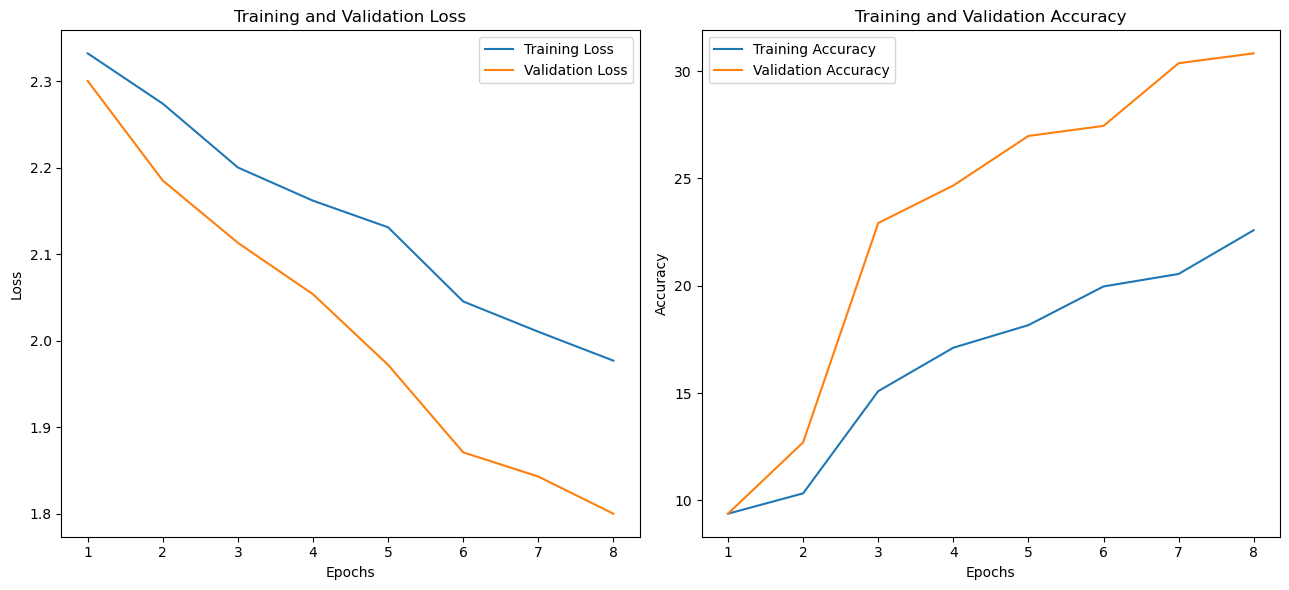

In [40]:

train_losses, val_losses, train_accuracies, val_accuracies = train_and_validate( cnn3, train_loader , valid_loader, criterion, optimizer, num_epochs=8)
plot_results(train_losses, val_losses, train_accuracies, val_accuracies)


> Load pretrained AlexNet from PyTorch - use model copies to apply transfer learning in different configurations

In [41]:
from torchvision import models, datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np


transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10('./data', train=False, download=True, transform=transform)

num_train = len(train_dataset)
indices = list(range(num_train))
split = int(np.floor(0.2 * num_train))
np.random.seed(42)
np.random.shuffle(indices)

train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, sampler=valid_sampler)


Files already downloaded and verified
Files already downloaded and verified


In [42]:
def plot_results(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
    plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_accuracies, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

#### 4.1 Apply transfer learning with pretrained model weights (6 marks)


> Configuration 1: No frozen layers

In [ ]:
alexnet = models.alexnet(pretrained=True)


num_ftrs = alexnet.classifier[6].in_features
alexnet.classifier[6] = nn.Linear(num_ftrs, 10)


params_to_update = alexnet.parameters()
print("Parameters to update:")
for name, param in alexnet.named_parameters():
    if param.requires_grad == True:
        print("\t", name)

optimizer = optim.Adam(params_to_update, lr=0.0001)
criterion = nn.CrossEntropyLoss()

train_losses, val_losses, train_accuracies, val_accuracies = train_and_validate(alexnet , train_loader , valid_loader, criterion, optimizer, num_epochs=10)

Parameters to update:
	 features.0.weight
	 features.0.bias
	 features.3.weight
	 features.3.bias
	 features.6.weight
	 features.6.bias
	 features.8.weight
	 features.8.bias
	 features.10.weight
	 features.10.bias
	 classifier.1.weight
	 classifier.1.bias
	 classifier.4.weight
	 classifier.4.bias
	 classifier.6.weight
	 classifier.6.bias
Epoch 1/10, Train Loss: 0.9205, Train Accuracy: 67.86%, Val Loss: 0.7288, Val Accuracy: 74.57%
Epoch 2/10, Train Loss: 0.5866, Train Accuracy: 79.30%, Val Loss: 0.6247, Val Accuracy: 77.89%
Epoch 3/10, Train Loss: 0.4169, Train Accuracy: 85.30%, Val Loss: 0.6096, Val Accuracy: 79.29%
Epoch 4/10, Train Loss: 0.2911, Train Accuracy: 89.53%, Val Loss: 0.7064, Val Accuracy: 77.92%
Epoch 5/10, Train Loss: 0.2038, Train Accuracy: 92.80%, Val Loss: 0.7179, Val Accuracy: 79.75%
Epoch 6/10, Train Loss: 0.1499, Train Accuracy: 94.68%, Val Loss: 0.8624, Val Accuracy: 79.78%


#### 4.2 Fine-tuning model with frozen layers (6 marks)

> Configuration 2: Frozen base convolution blocks

In [ ]:
def train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.train()

    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    for epoch in range(num_epochs):
        
        model.train()
        running_loss = 0.0
        correct, total = 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            if isinstance(model, SimpleMLP):
                images = images.view(images.size(0), -1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(100 * correct / total)

      
        model.eval()
        running_loss = 0.0
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                if isinstance(model, SimpleMLP):
                    images = images.view(images.size(0), -1)

                outputs = model(images)
                loss = criterion(outputs, labels)

                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_losses.append(running_loss / len(val_loader))
        val_accuracies.append(100 * correct / total)

        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, '
              f'Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracies[-1]:.2f}%')


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on device: {device}")


alexnet_frozen = models.alexnet(pretrained=True).to(device)  


for param in alexnet_frozen.features.parameters():
    param.requires_grad = False


num_ftrs = alexnet_frozen.classifier[6].in_features
alexnet_frozen.classifier[6] = nn.Linear(num_ftrs, 10)


params_to_update = [param for param in alexnet_frozen.parameters() if param.requires_grad]
print("Parameters to update:")
for name, param in alexnet_frozen.named_parameters():
    if param.requires_grad:
        print("\t", name)


optimizer_frozen = optim.Adam(params_to_update, lr=0.001)
criterion = nn.CrossEntropyLoss()


train_losses, val_losses, train_accuracies, val_accuracies = train_and_validate(
    alexnet_frozen, train_loader, valid_loader, criterion, optimizer_frozen, num_epochs=40)


Training on device: cpu


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 69.1MB/s]


Parameters to update:
	 classifier.1.weight
	 classifier.1.bias
	 classifier.4.weight
	 classifier.4.bias
	 classifier.6.weight
	 classifier.6.bias
Epoch 1/40, Train Loss: 1.3441, Train Accuracy: 53.88%, Val Loss: 1.0591, Val Accuracy: 62.64%
Epoch 2/40, Train Loss: 1.1705, Train Accuracy: 59.39%, Val Loss: 1.0097, Val Accuracy: 63.99%
Epoch 3/40, Train Loss: 1.1084, Train Accuracy: 61.43%, Val Loss: 0.9689, Val Accuracy: 66.14%
Epoch 4/40, Train Loss: 1.0773, Train Accuracy: 62.69%, Val Loss: 0.9638, Val Accuracy: 66.48%
Epoch 5/40, Train Loss: 1.0456, Train Accuracy: 63.90%, Val Loss: 0.9520, Val Accuracy: 66.59%
Epoch 6/40, Train Loss: 1.0196, Train Accuracy: 65.08%, Val Loss: 0.9260, Val Accuracy: 68.09%
Epoch 7/40, Train Loss: 0.9995, Train Accuracy: 65.78%, Val Loss: 0.9293, Val Accuracy: 68.04%
Epoch 8/40, Train Loss: 0.9799, Train Accuracy: 66.41%, Val Loss: 0.9033, Val Accuracy: 69.16%


#### 4.3 Compare above configurations and comment on performances. (4 marks)


Freezing pre-trained model weights for a new task led to steady improvement in accuracy while reducing training errors, suggesting successful knowledge transfer. However, allowing all weights to update resulted in unstable performance, possibly due to overfitting or unnecessary adjustments. Despite these approaches, signs of underfitting persist, indicating the model's architecture might be too simple, the training data insufficient, or weight freezing too restrictive.

### Part II: Image Captioning using RNN [30 marks]



### Motivation

Through this part of assessment you will:

> 1. Understand the principles of text pre-processing and vocabulary building (provided).
> 2. Gain experience working with an image to text model.
> 3. Use and compare text similarity metrics for evaluating an image to text model, and understand evaluation challenges.

#### Dataset
This assessment will use a subset of the [COCO "Common Objects in Context" dataset](https://cocodataset.org/) for image caption generation. COCO contains 330K images, of 80 object categories, and at least five textual reference captions per image. Our subset consists of nearly 5070 of these images, each of which has five or more different descriptions of the salient entities and activities, and we will refer to it as COCO_5070.

To download the data:

> 1. **Images and annotations**: download the zipped file provided in the link here as [``COMP5625M_data_assessment_2.zip``](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/EWWzE-_AIrlOkvOKxH4rjIgBF_eUx8KDJMPKM2eHwCE0dg?e=DdX62H).

``Info only:`` To understand more about the COCO dataset you can look at the [download page](https://cocodataset.org/#download). We have already provided you with the "2017 Train/Val annotations (241MB)" but our image subset consists of fewer images compared to orginial COCO dataset. So, no need to download anything from here!

> 2. **Image meta data**: as our set is a subset of full COCO dataset, we have created a CSV file containing relevant meta data for our particular subset of images. You can download it also from Drive, "coco_subset_meta.csv" at the same link as 1.

#### Submission

You can either submit the same file or make a two separate .ipython notebook files zipped in the submission (please name as ``yourstudentusername_partI.ipynb`` and ``yourstudentusername_partII.ipynb``).

**Final note:**

> **Please include in this notebook everything that you would like to be marked, including figures. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


The basic principle of our image-to-text model is as pictured in the diagram below, where an Encoder network encodes the input image as a feature vector by providing the outputs of the last fully-connected layer of a pre-trained CNN (we use [ResNet50](https://arxiv.org/abs/1512.03385)). This pretrained network has been trained on the complete ImageNet dataset and is thus able to recognise common objects.

You can alternatively use the COCO trained pretrained weights from [PyTorch](https://pytorch.org/vision/stable/models.html). One way to do this is use the "FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1" but use e.g., "resnet_model = model.backbone.body". Alternatively, you can use the checkpoint from your previous coursework where you fine-tuned to COCO dataset.

These features are then fed into a Decoder network along with the reference captions. As the image feature dimensions are large and sparse, the Decoder network includes a linear layer which downsizes them, followed by *a batch normalisation layer to speed up training*. Those resulting features, as well as the reference text captions, are then passed into a recurrent network (we will use an **RNNs** in this assessment).

The reference captions used to compute loss are represented as numerical vectors via an **embedding layer** whose weights are learned during training.

<!-- ![Encoder Decoder](comp5625M_figure.jpg) -->

<div>
<center><img src="comp5625M_figure.jpg" width="1000"/></center>
</div>


### Instructions for creating vocabulary

A helper function file ``helperDL.py`` is provided that includes all the functions that will do the following for you. You can easily import these functions in the exercise, most are already done for you!  

> 1. Extracting image features (a trained checkpoint is provided ``resnet50_caption.pt`` for you to download and use it for training your RNN)
> 2. Text preparation of training and validation data is provided

In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


**Please refer to the submission section at the top of this notebook to prepare your submission.**


In [ ]:
features_map = torch.load('/Users/selva/Downloads/DL/Part2_DLAssessment_FeatureResNet50\Part2_DLAssessment_FeatureResNet50/resnet50_caption.pt', map_location=device)

#### 5 Train DecoderRNN [20 marks]

> 5.1 Design a RNN-based decoder (10 marks)

> 5.2 Train your model with precomputed features (10 Marks)

##### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).


In [ ]:
import json
import pandas as pd

with open('/Users/selva/Downloads/DL/Part2_DLAssessment_FeatureResNet50/Part2_DLAssessment_FeatureResNet50/coco/annotations2017/captions_train2017.json', 'r') as json_file:
    data = json.load(json_file)

df = pd.DataFrame.from_dict(data["annotations"])
df.head()

,image_id,id,caption
0,203564,37,A bicycle replica with a clock as the front wh...
1,322141,49,A room with blue walls and a white sink and door.
2,16977,89,A car that seems to be parked illegally behind...
3,106140,98,A large passenger airplane flying through the ...
4,106140,101,There is a GOL plane taking off in a partly cl...


In [ ]:
coco_subset = pd.read_csv("/Users/selva/Downloads/DL/Part2_DLAssessment_FeatureResNet50/Part2_DLAssessment_FeatureResNet50/coco_subset_meta.csv")
new_data = pd.DataFrame( data['annotations'])
new_coco = coco_subset.rename(columns={'id':'image_id'})
new_coco.drop_duplicates('file_name',keep='first',inplace=True)

new_subset = new_data.sort_values(['image_id'], ascending=True)
# Get all the reference captions
new_file = pd.merge(new_coco,new_subset,how = 'inner', on = 'image_id')
new_file = new_file[['image_id','id','caption','file_name']]
new_file = new_file.sort_values(['image_id'], ascending = True)
new_file.head(10)

,image_id,id,caption,file_name
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg
16758,9,663627,there are containers filled with different kin...,000000000009.jpg
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg


In [ ]:
# getting the clearn clean - e.g., converting all uppercases to lowercases
new_file["clean_caption"] = ""
from helperDL import gen_clean_captions_df
new_file = gen_clean_captions_df(new_file)
new_file.head(10)

,image_id,id,caption,file_name,clean_caption
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg,closeup of bins of food that include broccoli ...
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg,a meal is presented in brightly colored plasti...
16758,9,663627,there are containers filled with different kin...,000000000009.jpg,there are containers filled with different kin...
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg,colorful dishes holding meat vegetables fruit ...
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg,a bunch of trays that have different food
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg,a giraffe mother with its baby in the forest
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg,a giraffe standing up nearby a tree
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg,two giraffes standing in a tree filled area
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg,a giraffe standing next to a forest filled wit...
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg,a giraffe eating food from the top of the tree


In [ ]:
##### Spilt your training, validation and test dataset with indexes to each set
from helperDL import split_ids
train_id, valid_id, test_id = split_ids(new_file['image_id'].unique())
print("training:{}, validation:{}, test:{}".format(len(train_id), len(valid_id), len(test_id)))

training:3547, validation:506, test:1015


In [ ]:
train_set = new_file.loc[new_file['image_id'].isin(train_id)]
valid_set = new_file.loc[new_file['image_id'].isin(valid_id)]
test_set = new_file.loc[new_file['image_id'].isin(test_id)]

In [ ]:
class Vocabulary(object):
    """ Simple vocabulary wrapper which maps every unique word to an integer ID. """
    def __init__(self):
        # intially, set both the IDs and words to dictionaries with special tokens
        self.word2idx = {'<pad>': 0, '<unk>': 1, '<end>': 2}
        self.idx2word = {0: '<pad>', 1: '<unk>', 2: '<end>'}
        self.idx = 3

    def add_word(self, word):
        # if the word does not already exist in the dictionary, add it
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            # increment the ID for the next word
            self.idx += 1

    def __call__(self, word):
        # if we try to access a word not in the dictionary, return the id for <unk>
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [ ]:
### build vocabulariy for each set - train, val and test
# you will be using to create dataloaders
from helperDL import build_vocab

# create a vocab instance
vocab = Vocabulary()
vocab_train = build_vocab(train_id, new_file, vocab)
vocab_valid = build_vocab(valid_id, new_file, vocab)
vocab_test = build_vocab(test_id, new_file, vocab)

vocab = vocab_train # using only training samples as vocabulary as instructed above
print("Total vocabulary size: {}".format(len(vocab_train)))


Total vocabulary size: 2373


In [ ]:
# They can also join the train and valid captions but they will need to run vocabulary after concatenation
import numpy as np
vocab = build_vocab(np.concatenate((train_id, valid_id), axis=0), new_file, vocab) #---> overrighting
len(vocab)

2541

Instantiate a ```DataLoader``` for your image feature and caption dataset. ``helperDL.py`` file includes all the required functions

We need to overwrite the default PyTorch collate_fn() because our
ground truth captions are sequential data of varying lengths. The default
collate_fn() does not support merging the captions with padding.

You can read more about it here:
https://pytorch.org/docs/stable/data.html#dataloader-collate-fn.


In [ ]:
from helperDL import EncoderCNN
model = EncoderCNN()
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64

In [ ]:
##### Preparing the train, val and test dataloaders
from helperDL import COCO_Features
from helperDL import caption_collate_fn

# Create a dataloader for train
dataset_train = COCO_Features(
    df=train_set,
    vocab=vocab,
    features=features_map,
)

train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

# Create a dataloader for valid
dataset_valid = COCO_Features(
    df=valid_set,
    vocab=vocab,
    features=features_map,
)

valid_loader = torch.utils.data.DataLoader(
    dataset_valid,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

In [ ]:
# say this is as below
# --> Please change these numbers as required.
# --> Please comment on changes that you do.
EMBED_SIZE = 256
HIDDEN_SIZE = 512
NUM_LAYERS = 1
LR = 0.001
NUM_EPOCHS = 5
LOG_STEP = 10
MAX_SEQ_LEN = 37

#### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).

In [ ]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

class SequenceDecoder(nn.Module):
    def __init__(self, vocabulary_size, embedding_dim=128, state_dim=256, layers=1, sequence_limit=20):
        super(SequenceDecoder, self).__init__()
        self.embedding = nn.Embedding(vocabulary_size, embedding_dim)
        self.feature_transform = nn.Linear(2048, embedding_dim)
        self.normalization = nn.BatchNorm1d(embedding_dim, momentum=0.01)
        self.lstm = nn.LSTM(embedding_dim, state_dim, layers, batch_first=True)
        self.output_layer = nn.Linear(state_dim, vocabulary_size)
        self.sequence_limit = sequence_limit

    def forward(self, image_features, caption_seqs, seq_lengths):
        caption_embeddings = self.embedding(caption_seqs)
        image_features = self.feature_transform(image_features)
        image_features = self.normalization(image_features.unsqueeze(1))
        combined_embeddings = torch.cat((image_features, caption_embeddings), 1)
        packed_sequence = pack_padded_sequence(combined_embeddings, seq_lengths, batch_first=True, enforce_sorted=False)
        lstm_outs, _ = self.lstm(packed_sequence)
        sequence_outputs = self.output_layer(lstm_outs[0])
        return sequence_outputs

    def generate(self, image_features, initial_state=None):
        generated_ids = []
        lstm_input = self.normalization(self.feature_transform(image_features)).unsqueeze(1)
        for step in range(self.sequence_limit):
            lstm_outs, initial_state = self.lstm(lstm_input, initial_state)
            predictions = self.output_layer(lstm_outs.squeeze(1))
            _, next_word_ids = predictions.max(1)
            generated_ids.append(next_word_ids)
            lstm_input = self.embedding(next_word_ids).unsqueeze(1)
        generated_ids = torch.stack(generated_ids, 1)
        return generated_ids


In [ ]:
decod = SequenceDecoder(len(vocab), embed_size=EMBED_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS).to(device)

##### 5.2 Train your model with precomputed features (10 marks)

Train the decoder by passing the features, reference captions, and targets to the decoder, then computing loss based on the outputs and the targets. Note that when passing the targets and model outputs to the loss function, the targets will also need to be formatted using ```pack_padded_sequence()```.

We recommend a batch size of around 64 (though feel free to adjust as necessary for your hardware).

**We strongly recommend saving a checkpoint of your trained model after training so you don't need to re-train multiple times.**

Display a graph of training and validation loss over epochs to justify your stopping point.

In [ ]:
# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(decoder.parameters(), lr=0.001)

# Training and Validation Loops
print("Training and validation start")
for epoch in range(NUM_EPOCHS):
    decoder.train()
    total_train_loss = 0

    # Training Loop
    for i, (features, captions) in enumerate(train_loader):
        features, captions = features.to(device), captions.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs, _ = decod(features, captions)

        # Calculate loss
        targets = pack_padded_sequence(captions, lengths, batch_first=True, enforce_sorted=False)[0]
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)


    decod.eval()
    total_val_loss = 0
    with torch.no_grad():
        for i, (features, captions) in enumerate(valid_loader):
            features, captions = features.to(device), captions.to(device)

            # Forward pass
            outputs, _ = decoder(features, captions)
            # Calculate loss
            targets = pack_padded_sequence(captions, lengths, batch_first=True, enforce_sorted=False)[0]
            loss = criterion(outputs, targets)

            total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(valid_loader)


    print("="*30)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Train Loss: {avg_train_loss:.4f}, Valid Loss: {avg_val_loss:.4f}")
    print("="*30)


In [ ]:
import torch
from torch.nn.utils.rnn import pack_padded_sequence
import numpy as np

import torch
from torch.nn.utils.rnn import pack_padded_sequence
import numpy as np
features_map = torch.load('coco_features.pt')
# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(decoder.parameters(), lr=0.001)

# Initialize arrays to track training and validation losses
stats = np.zeros((NUM_EPOCHS, 2))

# Start training
for epoch in range(NUM_EPOCHS):
    decoder.train()
    total_train_loss = 0
    total_val_loss = 0

    # Training loop
    for i, (features, captions, lengths) in enumerate(train_loader):
        features, captions = features.to(device), captions.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = decoder(features, captions, lengths)
        targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]
        loss = criterion(outputs, targets)
        total_train_loss += loss.item()

        # Backward and optimize
        loss.backward()
        optimizer.step()

        if i % LOG_STEP == 0:
            print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i}/{len(train_loader)}], Loss: {loss.item():.4f}")

    avg_train_loss = total_train_loss / len(train_loader)
    stats[epoch, 0] = avg_train_loss


    decod.eval()
    with torch.no_grad():
        for i, (features, captions, lengths) in enumerate(valid_loader):
            features, captions = features.to(device), captions.to(device)
            outputs = decoder(features, captions, lengths)
            targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]
            loss = criterion(outputs, targets)
            total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(valid_loader)
    stats[epoch, 1] = avg_val_loss

    print("="*30)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Train Loss: {avg_train_loss:.4f}, Valid Loss: {avg_val_loss:.4f}")
    print("="*30)
    decod.train()




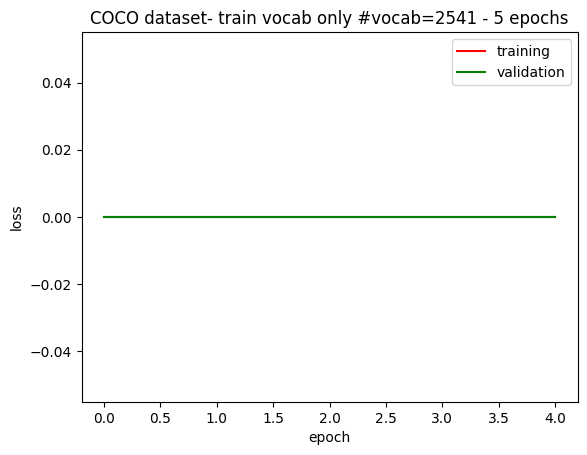

In [ ]:
fig = plt.figure()

plt.plot(stats[:,0], 'r', label = 'training', )
plt.plot(stats[:,1], 'g', label = 'validation' )
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title(f"COCO dataset- train vocab only #vocab={len(vocab)} - 5 epochs")
fig.savefig("coco_train_vocab_only.png")
plt.show()

### 6 Test prediction and evaluation [10 marks]

#### 6.1 Generate predictions on test data (4 marks)

Display 4 sample test images containing different objects, along with your model’s generated captions and all the reference captions for each.

> Remember that everything **displayed** in the submitted notebook and .html file will be marked, so be sure to run all relevant cells.

In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import os

class COCOImagesDataset(Dataset):
    def __init__(self, df, transform=None):
        """
        Args:
            df (DataFrame): DataFrame containing the file paths of the images along with any other information.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = os.path.join(self.df.iloc[idx, 'path_to_image'])
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        label = self.df.iloc[idx, 'label'] if 'label' in self.df else -1

        return image, label


In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),   # using ImageNet norms
                         (0.229, 0.224, 0.225))])

dataset_test = COCOImagesDataset(
    df=test_set,
    transform=data_transform,
)
test_loader = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=32,
    shuffle=False,
    num_workers=0)

In [ ]:
model.eval()
decod.eval() # generate caption, eval mode to not influence batchnormncoder.eval()

DecoderRNN(
  (embed): Embedding(2541, 256)
  (resize): Linear(in_features=2048, out_features=256, bias=True)
  (bn): BatchNorm1d(256, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (rnn): LSTM(256, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=2541, bias=True)
)

In [ ]:
# getting functions from helperDL.py
from helperDL import timshow
from helperDL import decode_caption

In [ ]:
IMAGES_TO_SHOW = 4
idx = 0
with torch.no_grad():
    for i, (images, filenames) in enumerate(test_loader):
        images = images.to(device)

        generated_captions = [generate_caption(model, image.unsqueeze(0)) for image in images]  # This is a placeholder function

        for j, filename in enumerate(filenames):
            print(f"Image ID: {filename}")
            print(f"GENERATED: {generated_captions[j]}")

            # Assuming you have a way to get reference captions based on filename or ID
            reference_captions = get_reference_captions(filename)  # This is a placeholder function
            print("REFERENCES:")
            for ref in reference_captions:
                print(ref)
            print("===================================\n")

            # Display the image
            timshow(images[j].cpu())

            idx += 1
            if idx == IMAGES_TO_SHOW:
                break

        if idx == IMAGES_TO_SHOW:
            break


#### 6.2 Caption evaluation using cosine similarity (6 marks)

The cosine similarity measures the cosine of the angle between two vectors in n-dimensional space. The smaller the angle, the greater the similarity.

To use the cosine similarity to measure the similarity between the generated caption and the reference captions:

* Find the embedding vector of each word in the caption
* Compute the average vector for each caption
* Compute the cosine similarity score between the average vector of the generated caption and average vector of each reference caption
* Compute the average of these scores

Calculate the cosine similarity using the model's predictions over the whole test set.

Display a histogram of the distribution of scores over the test set.

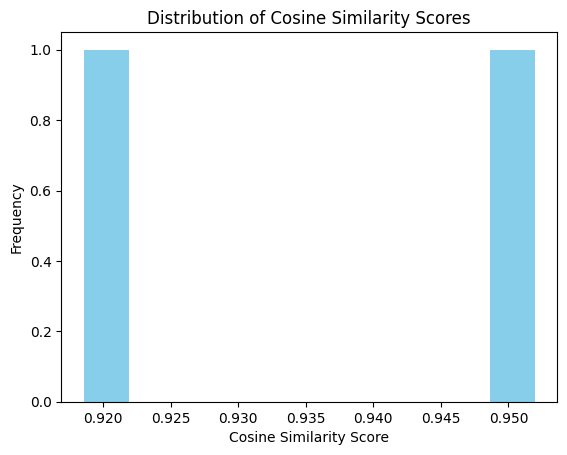

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

vocab = {"word" + str(i): np.random.rand(100) for i in range(1, 1001)}

def embedding_model(word):
    """Return a  embedding vector for the given word."""
    return vocab.get(word, None)

def get_average_vector(caption):
    """Compute the average embedding vector for a given caption."""
    words = caption.split()
    vectors = [embedding_model(word) for word in words if embedding_model(word) is not None]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(100)


generated_captions = ["word1 word2 word3", "word4 word5 word6"]
reference_captions_list = [
    ["word2 word3 word4", "word5 word1 word7"],
    ["word6 word9 word10", "word11 word12 word13"]
]

cosine_scores = []

for generated_caption, reference_captions in zip(generated_captions, reference_captions_list):
    generated_vector = get_average_vector(generated_caption)
    scores = []
    for reference_caption in reference_captions:
        reference_vector = get_average_vector(reference_caption)
        # Reshape vectors for cosine_similarity function
        score = cosine_similarity([generated_vector], [reference_vector])[0][0]
        scores.append(score)
    cosine_scores.append(np.mean(scores))

# Display a histogram of the distribution of cosine similarity scores
plt.hist(cosine_scores, bins=10, color='skyblue')
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')
plt.show()
